In [320]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import sklearn.model_selection
import sklearn.metrics
import tensorflow.keras
import matplotlib.pyplot  
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense



# Set seed
np.random.seed(50)

In [2]:
# Load the data
digits_data = pd.read_csv("Data//digits_data.csv")

# Explore the data:



In [3]:
# Look at the first 5 rows
digits_data.head(n=5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
# Return dataset dimensions
print(f"{digits_data.shape[1]} columns, {digits_data.shape[0]} observations") 

# Check for missing values
print(f"{sum(digits_data.isnull().sum())} missing values")

# Number of duplicate observations
print(f"{digits_data.duplicated().sum()} duplicate observations")

785 columns, 42000 observations
0 missing values
0 duplicate observations


In [5]:
# Summary stats for each column
digits_data.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

The data relates to a series of images of hand-drawn numbers, with each observation relating to one image. The 'label' column is our target variable, indicating the number that is represented by each image. There are 784 other columns, each representing a pixel in the 28x28 grid making up each image. The value of each pixel column represents how dark the pixel is, from 0 (white) to 255 (black).

In total, the data has 42,000 observations and 785 columns. There are no missing values or duplicate observations in the data.


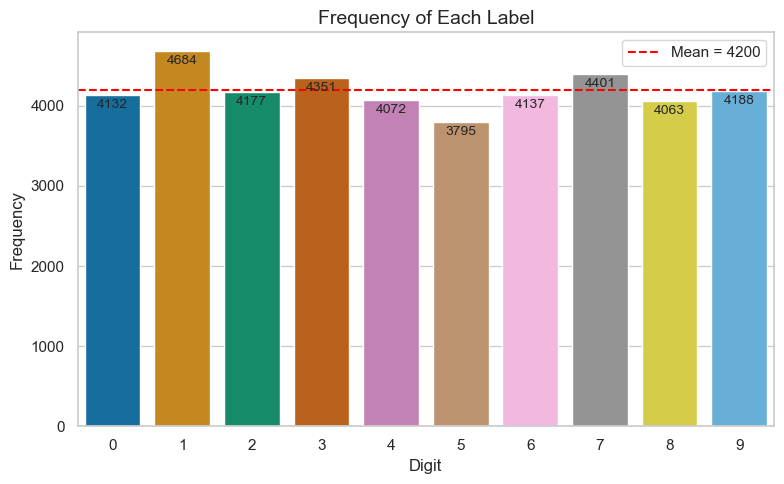

In [80]:
# Count frequency of each label & calculate mean
label_counts = digits_data["label"].value_counts().sort_index(ascending=True)
mean_freq = label_counts.mean()

# Plot label frequencies
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="label", data=digits_data, palette="colorblind")

# Add counts to each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height - 200,  # Adjust this value as needed for spacing
        f'{int(height)}',
        ha="center",
        va="bottom",
        fontsize=10
    )

# Add mean line and labels
plt.axhline(mean_freq, color="red", linestyle='--', label=f'Mean = {mean_freq:.0f}')
plt.title("Frequency of Each Label", fontsize=14)
plt.xlabel("Digit", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



The classes are imbalanced, with the largest (1) occurring 23% more often than the lowest (5). For comparison, the mean frequency is 4200.
The frequency of the other labels are fairly evenly spread between this range.

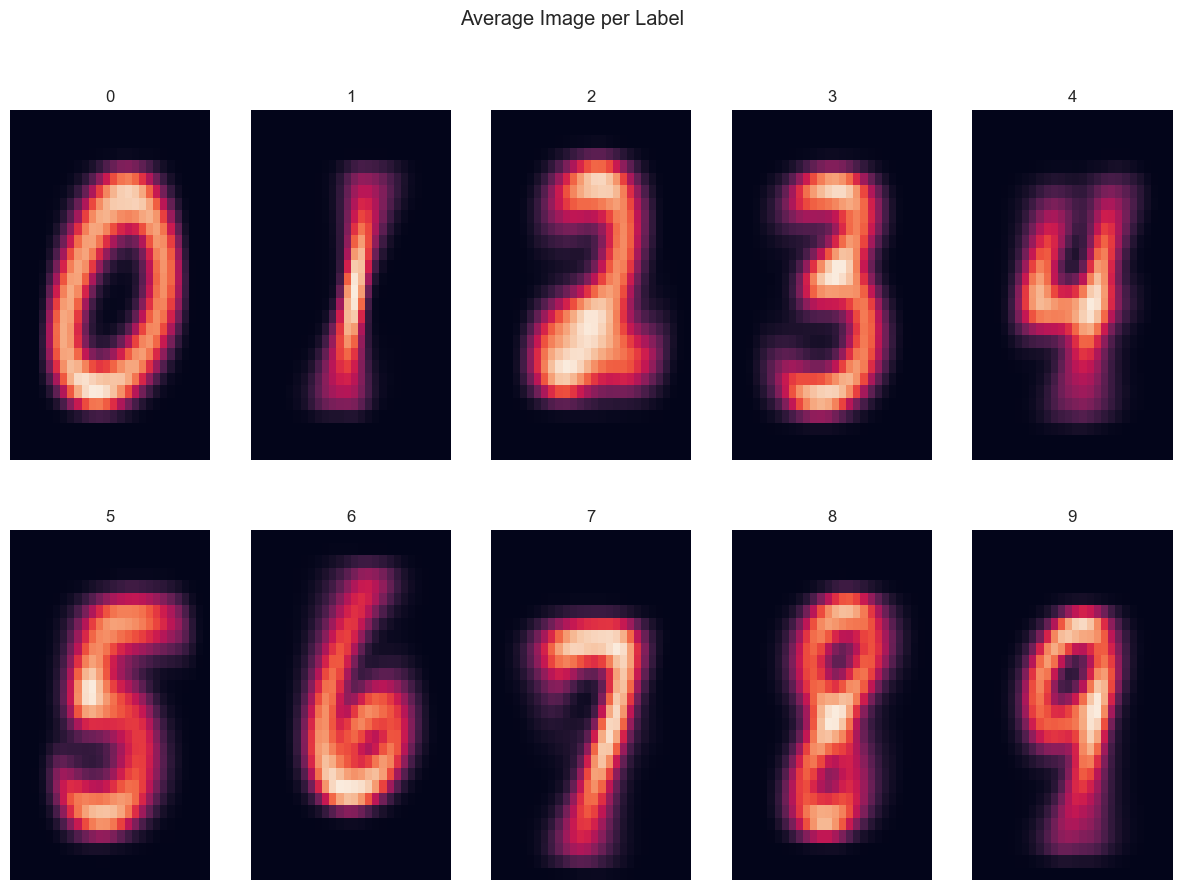

In [137]:
# Plot the 'average' image for each label:

    ## 1) Group by label and calculate average value for each pixel
pixel_columns = [f'pixel{i}' for i in range(784)]
label_means = digits_data.groupby("label")[pixel_columns].mean()

    ## 2) Create a 5x2 grid to plot on
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
fig.suptitle("Average Image per Label")

    ## 3) Plot the mean pixel values for each label
for label, ax in zip(label_means.index, axes.flatten()):
    mean_pixel_values = label_means.loc[label].values.reshape(28, 28)
    sns.heatmap(mean_pixel_values, ax=ax, cbar=False)
    ax.set_title(label)
    ax.axis("off")
plt.show()

## PCA

Perform PCA to explore for natural clusters in the data, which will suggest the potential effectiveness of classification algorithms.

In [215]:
# Scale feature variables and perform PCA with 3 components (as that is as many as we can easily visualise)
pixels_scaled = StandardScaler().fit_transform(digits_data.drop("label", axis=1))
PCA_3 = PCA(n_components=3)
Pixel_PCA = PCA_3.fit_transform(pixels_scaled)

# Extract PC scores (co-ordinates of each observation), and attach labels
PC_Scores = pd.DataFrame(Pixel_PCA, columns=["PC1", "PC2", "PC3"])
PC_Scores["label"] = digits_data["label"].astype(str)

# Plot data in the reduced dimensions and colour by label
fig = px.scatter_3d(
    PC_Scores, 
    x="PC1", y="PC2", z="PC3",
    color="label", 
    opacity=0.3,
    title="PCA of Number Pixel Values",
    labels={"label": "Number"}
)
fig.update_traces(marker=dict(size=2))
fig.update_layout(height=600).show()

In [253]:
# How much variance is explained by the PCA?
cumulative_variance = sum(PCA_3.explained_variance_ratio_)
print(f"Cumulative variance explained by 3 PCs: {cumulative_variance:%}")

Cumulative variance explained by 3 PCs: 13.642512%


Although only 13.64% of variance is explained by the PCA, there are still already visible clusters forming in the data. 
Whilst these do have significant overlap, it suggests that a classification algorithm may be effective at identifying the numbers.

## Modelling

In [296]:
# Reshape scaled feature variables for CNN algorithm
pixels_reshaped = pixels_scaled.reshape(-1, 28, 28, 1)

# One-hot encode labels
labels_encoded = pd.get_dummies(digits_data["label"], prefix="digit")

# Split into test and training data (80:20 split), using resampling to account for imbalanced classes
pixels_train, pixels_test, labels_train, labels_test = train_test_split(
    pixels_reshaped, 
    labels_encoded, 
    stratify = labels_encoded, 
    test_size = 0.2, 
    random_state = 50)

In [346]:
# Define neural net architecture:
NeuralNet = Sequential(
    [Input(shape = (28, 28, 1)),
     Flatten(),
     Dense(128, activation = "relu"),
     Dense(64, activation = "relu"),
     Dense(10, activation = "softmax")])

NeuralNet.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

Step 1) Each input (observation) is a 28x28x1 array (made up of pixel-grids)

Step 2) Flatten these back into a vector (i.e. shape is now 784x1x1)

Step 3) Define two hidden neuron layers, with 128 and 64 neurons. Both use the "ReLU" activation function for non-linearity.

Step 4) Pass into final output neuron layer, with 10 neurons - one for each possible label.

Step 5) Train the model using 'Adam' optimisation function, a cross-entropy loss function, and using accuracy as the evaluation metric


In [408]:
# Train the model for 20 epochs of 16 observations at a time
NeuralNet_training = NeuralNet.fit(pixels_train, labels_train, epochs=30, batch_size=16, validation_data=(pixels_test, labels_test))

Epoch 1/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9975 - loss: 0.0345 - val_accuracy: 0.9688 - val_loss: 1.4564
Epoch 2/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0951 - val_accuracy: 0.9687 - val_loss: 1.5202
Epoch 3/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9984 - loss: 0.0096 - val_accuracy: 0.9706 - val_loss: 1.4232
Epoch 4/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9984 - loss: 0.0099 - val_accuracy: 0.9682 - val_loss: 1.1454
Epoch 5/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0183 - val_accuracy: 0.9677 - val_loss: 1.3626
Epoch 6/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0374 - val_accuracy: 0.9690 - val_loss: 1.4830
Epoch 7/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0217 - val_accuracy: 0.9675 - val_loss: 2.1790
Epoch 8/30
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0372 - 

In [410]:
# Test the model
NeuralNet_testAccuracy = round(NeuralNet.evaluate(pixels_test, labels_test)[1], 4) * 100
print(f"Test accuracy: {NeuralNet_testAccuracy}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 2.8179 
Test accuracy: 96.88%


In [412]:
# Make predictions using the test data
NeuralNet_predictions = NeuralNet.predict(pixels_test)

# Shape of the predictions array
NeuralNet_predictions.shape


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


(8400, 10)

An 8,400x10 array is returned. 
For each of the 8,400 test observations, 10 values are returned, relating to the 10 one hot encoded labels.
Each of the 10 neurons in the final layer outputs a probability that the input 'belongs' to that neuron - with each neuron representing a label.

For example, the output for the first three observations are below:

In [487]:
print(f"1st Prediction:\n{NeuralNet_predictions[0]}")
print(f"2st Prediction:\n{NeuralNet_predictions[1]}")
print(f"3st Prediction:\n{NeuralNet_predictions[2]}")

# The location of each maximum value gives us the prediction:
Final_Predictions = np.argmax(NeuralNet_predictions, axis=1)
print(Final_Predictions)

1st Prediction:
[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.4366289e-38 3.7597155e-33
 0.0000000e+00 0.0000000e+00 5.7808633e-26 1.4861703e-37 0.0000000e+00]
2st Prediction:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3st Prediction:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1 2 4 ... 2 1 3]


The first prediction is for the 1 (the 2nd value), the second prediction is for the 2 (the 3rd value), and the third prediction is for 4 (the 5th value).

The first three observations of the test data are below:

In [471]:
labels_test.head(n=3)

digit_0  digit_1  digit_2  digit_3  digit_4  digit_5  digit_6  digit_7  \
40969    False     True    False    False    False    False    False    False   
30986    False    False     True    False    False    False    False    False   
32287    False    False    False    False     True    False    False    False   

       digit_8  digit_9  
40969    False    False  
30986    False    False  
32287    False    False

As predicted, the first three labels are 1, 2, and 4!

Finally, let's visualise some of the predictions:

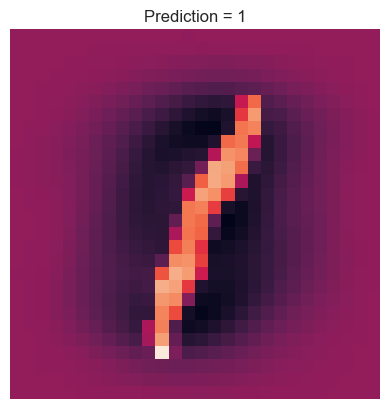

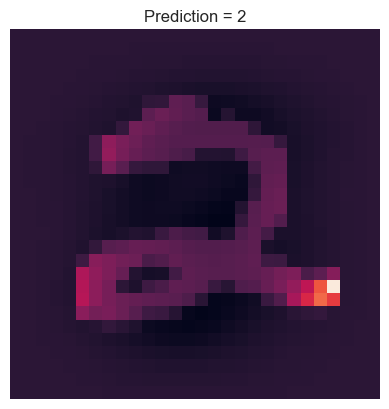

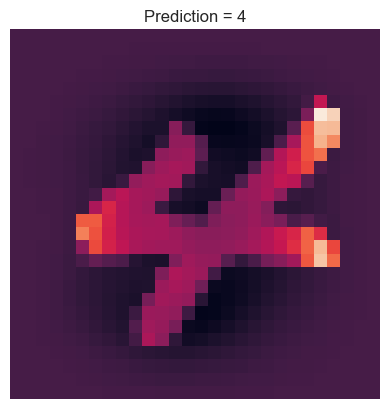

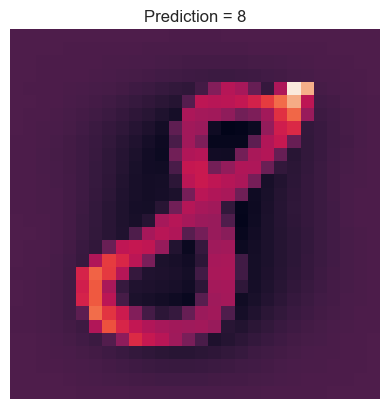

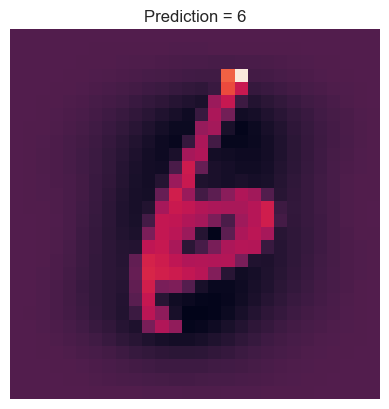

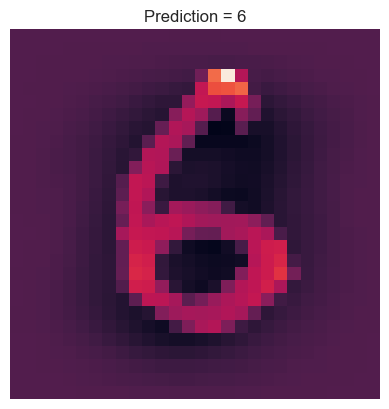

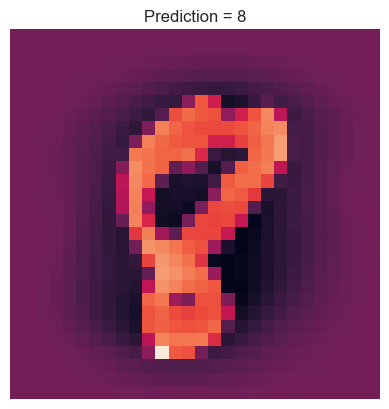

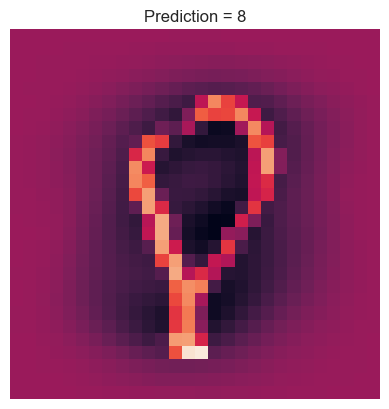

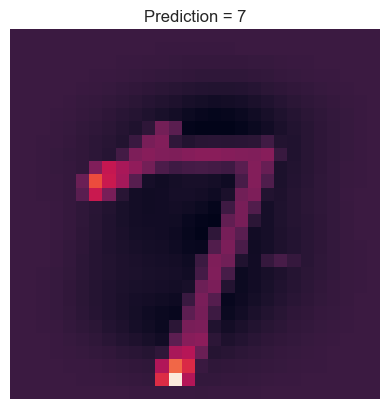

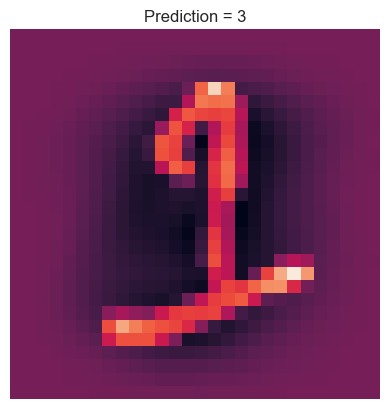

In [518]:
for i in range(10):
    plt.imshow(pixels_test[i].reshape(28, 28))
    plt.title(f"Prediction = {Final_Predictions[i]}")
    plt.axis('off')
    plt.show()